# 7 Statistics with NumPy
## 7_7 Histograms in NumPy part 2
### Multidimensional Histogram and how to use them


#### numpy.histogram2d(x, y, bins=10, range=None, density=None, weights=None)
- Compute the bi-dimensional histogram of two data samples.
- Ex. X = A[0]; Y = A[1]
- We can use a 2D histogram to get an idea of how the values are spread out across the plain.
- You can think about it as a histogram on top of scatter plot

#### numpy.histogramdd(sample, bins=10, range=None, density=None, weights=None)
- Compute the multidimensional histogram of some data.
- sample(N, D) array, or (N, D) array_like:  The data to be histogrammed.
    - When an array, each row is a coordinate in a D-dimensional space - such as histogramdd(np.array([p1, p2, p3])).
    - When an array_like, each element is the list of values for single coordinate - such as histogramdd((X, Y, Z)).
    - The first form should be preferred.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

np.__version__

'1.26.4'

In [17]:
# Function show_attr

def show_attr(arrnm: str) -> str:
    strout = f' {arrnm}: '

    for attr in ('shape', 'ndim', 'size', 'dtype'):     #, 'itemsize'):
            arrnm_attr = arrnm + '.' + attr
            strout += f'| {attr}: {eval(arrnm_attr)} '

    return strout

In [18]:
# Function make a real density matrix

def direct_dm(dm: np.ndarray) -> np.ndarray:
    return np.array(list(map(lambda row: row[::-1], dm))).T

def direct_dm_b(dm: np.ndarray) -> np.ndarray:
    nf_arr = np.ones_like(dm)
    for ix in range(dm.shape[0]):
        nf_arr[ix] = dm[ix][::-1]
    return nf_arr.T

### dm_real = np.array(list(map(lambda row: row[::-1], dm))).T


In [19]:
# Function that make all the calcs and show graphs

def histo2d_w_graph(xv: np.ndarray, yv: np.ndarray,
                    bs: int = 10, sid: bool = False):
    ''' Compute and plot NumPy 2-D histogram
    
    xv: xvalues, 1-D ndarray, first axis, X
    yv: yvalues
    bs: -optional- Bins number, default '10'
    sid: -optinal- Show Input Data, default 'False'
    ''' 
    # h2df: NumPy Histogram 2-D inside function
    h2df = np.histogram2d(x=xv, y=yv, bins=bs)

    # n_da: NumPy density array; x_e: X_edges; y_e: Y_edges
    n_da, x_e, y_e = h2df[0], h2df[1], h2df[2]

    # Seaborn two subplots graphs
    fig, axs = plt.subplots(ncols=2, figsize=(10,6))
    plt.subplots_adjust(wspace=0.3)

    h2d_plot = sns.histplot(x=xv, y=yv, ax=axs[0], bins=bs)
    h2d_plot.set(xticks=x_e, yticks=y_e)
    h2d_plot.set_title('2-D Histogram')

    sct = sns.scatterplot(x=xv, y=yv, ax=axs[1])
    sct.set(xticks=x_e, yticks=y_e)
    sct.set_title('Scatter plot')

    if sid:
      print(f'Input Data:\n X values: {xv}\n Y values: {yv}\n')

    print(f'NumPy Density Array:\n{n_da}')
    print(f'X Edges:\n {x_e}')
    print(f'Y Edges:\n {y_e}\n')
    print(f'Density Array with relocated values:\n'
          f'{np.array(list(map(lambda row: row[::-1], n_da))).T}')
    
    plt.show()


In [20]:
A = np.array([[1,0,0,3,1],
              [3,6,6,2,9]])
#              [4,5,3,8,0]])

print(show_attr('A'))
A

 A: | shape: (2, 5) | ndim: 2 | size: 10 | dtype: int32 


array([[1, 0, 0, 3, 1],
       [3, 6, 6, 2, 9]])

In [21]:
# 2D Histogram: A[0] is X and A[1] is Y
# np.histogram2d(A[0], A[1])) - np.histogram2d(A[0], A[1], bins=4))
# Set the bin size to 4 so the output is more contained 
h2d = np.histogram2d(A[0], A[1], bins=4)
display(h2d)

# Tuple: One 2D array (Density) and two 1D arrays (bins edges on X and on Y)
# There is a slight twist when we look at the density array, the values we see in
# the first row of the density array include all points whose X value falls within
# the first bin. Density Matrix -> DM
# DM ROW -> X bin | DM COLUMN -> Y bin

# The '2.' we see in the third position (DM[0,2]) suggest that there are two
# points which feature in the first bin on the X axis and the third bin on the
# Y axis. 
display(h2d[0][0,2])
# Therefore, we are looking for points that have X coordinates between 0 and 0..75
# and Y coordinates between 5.5 and 7.25. Lopking at matrix A they are: in X the
# two 0 and in Y the two 6
print(f'One point (X=0, Y=6). X A[0,1]: {A[0,1]}, Y A[1,1]: {A[1,1]}')
print(f'Other point (X=0, Y=6). X A[0,2]: {A[0,2]}, Y A[1,2]: {A[1,2]}')

# 2nd row of DM will represent all the points tha have X coords between
# 0.75 and 1.5. the ones appear in first and last place meaning one of
# them has an Y coordinate between 2 and 3.75 and the other one between
# 7.25 and 9. [in A they ara (1,3) and (1,9)]
# The last point (las 1 in DM) is x bettween 2.25 and 3. and Y between
# 2 and 3.75 and is (3,2)

# The 2-D histogram might not be as easy to read, but it give us a good idea
# of how density is distributed among the two axis

# Hay un pequeño cambio cuando observamos la matriz de densidad, los valores que
# vemos en la primera fila de la matriz de densidad incluyen todos los puntos
# cuyo valor X cae dentro del primer contenedor

(array([[0., 0., 2., 0.],
        [1., 0., 0., 1.],
        [0., 0., 0., 0.],
        [1., 0., 0., 0.]]),
 array([0.  , 0.75, 1.5 , 2.25, 3.  ]),
 array([2.  , 3.75, 5.5 , 7.25, 9.  ]))

2.0

One point (X=0, Y=6). X A[0,1]: 0, Y A[1,1]: 6
Other point (X=0, Y=6). X A[0,2]: 0, Y A[1,2]: 6


In [22]:
# Visualización using dircect_dm
np.array(list(map(lambda row: row[::-1], h2d[0]))).T

array([[0., 1., 0., 0.],
       [2., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 1., 0., 1.]])

array([[0., 1., 0., 0.],
       [2., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 1., 0., 1.]])

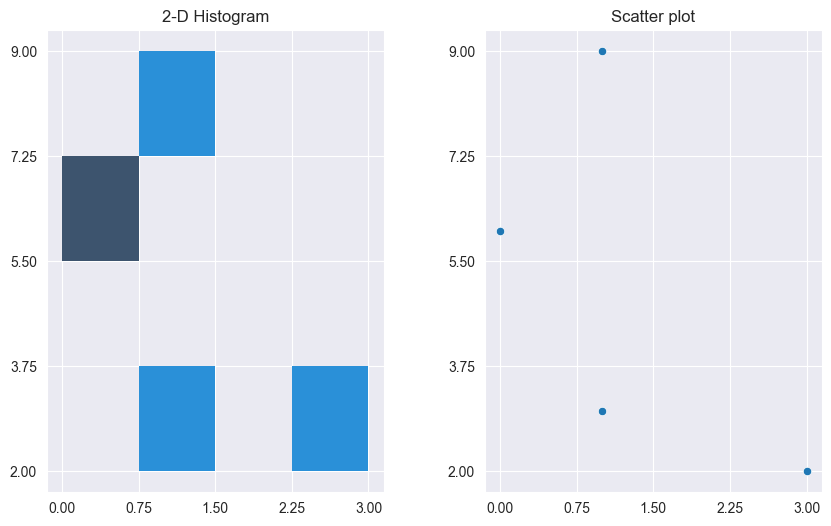

In [23]:


fig, axs = plt.subplots(ncols=2, figsize=(10,6),)
plt.subplots_adjust(wspace=0.3)

h2dp = sns.histplot(x=A[0], y=A[1], ax=axs[0], bins=4)
h2dp.set(xticks=h2d[1], yticks=h2d[2])
h2dp.set_title('2-D Histogram')

sct = sns.scatterplot(x=A[0], y=A[1], ax=axs[1])
sct.set(xticks=h2d[1], yticks=h2d[2])
sct.set_title('Scatter plot')

display(np.array(list(map(lambda row: row[::-1], h2d[0]))).T)
plt.show()


In [24]:
# If we have input arrays of more than five values we get a better
# idea of just how useful it is.
from numpy.random import Generator as gen 
from numpy.random import PCG64 as pcg 

array_RG = gen(pcg())
B = array_RG.integers(low=21, high=50, size=(2,15))
display(B)

h2d_b = np.histogram2d(B[0], B[1], bins=6)
h2d_b

array([[48, 29, 42, 41, 45, 24, 48, 40, 44, 37, 40, 44, 30, 26, 37],
       [40, 40, 43, 39, 27, 49, 38, 41, 40, 45, 41, 31, 49, 24, 28]],
      dtype=int64)

(array([[1., 0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0., 1.],
        [0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 3., 0.],
        [1., 1., 0., 3., 0., 0.]]),
 array([24., 28., 32., 36., 40., 44., 48.]),
 array([24.        , 28.16666667, 32.33333333, 36.5       , 40.66666667,
        44.83333333, 49.        ]))

## Exists Histograms of higher dimension than 2-D

In [25]:
# Re-defin matrix

M = np.array([[1,0,0,3,1],
              [3,6,6,2,9],
              [4,5,3,8,0]])

print(show_attr('M'))
M

 M: | shape: (3, 5) | ndim: 2 | size: 15 | dtype: int32 


array([[1, 0, 0, 3, 1],
       [3, 6, 6, 2, 9],
       [4, 5, 3, 8, 0]])

In [26]:
# If wue pass the entire matrix M transposed(), we´ll see that the output consists of four matrices
np.histogramdd(M.T, bins=4)
# There's a 2-D density array for each bin of the Z-coordinate array.
# If it helps you visualize this better, you can imagine we´re stacking the four density matrices to
# create a density tensor which depicts (representa) the density in three dimensions. 

(array([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 1., 1., 0.],
         [0., 0., 0., 0.]],
 
        [[0., 0., 1., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [1., 0., 0., 0.]],
 
        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],
 
        [[0., 0., 0., 1.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]]),
 [array([0.  , 0.75, 1.5 , 2.25, 3.  ]),
  array([2.  , 3.75, 5.5 , 7.25, 9.  ]),
  array([0., 2., 4., 6., 8.])])

Histograms

histogram(a[, bins, range, density, weights])
Compute the histogram of a dataset.

histogram2d(x, y[, bins, range, density, ...])
Compute the bi-dimensional histogram of two data samples.

histogramdd(sample[, bins, range, density, ...])
Compute the multidimensional histogram of some data.

bincount(x, /[, weights, minlength])
Count number of occurrences of each value in array of non-negative ints.

histogram_bin_edges(a[, bins, range, weights])
Function to calculate only the edges of the bins used by the histogram function.

digitize(x, bins[, right])
Return the indices of the bins to which each value in input array belongs.

### More cases and the use of hist2d_w_graph() function.

In [27]:
A = np.array([[1,0,0,3,1],
              [3,6,6,2,9],
              [4,5,3,8,0]])

print(show_attr('A'))
A

 A: | shape: (3, 5) | ndim: 2 | size: 15 | dtype: int32 


array([[1, 0, 0, 3, 1],
       [3, 6, 6, 2, 9],
       [4, 5, 3, 8, 0]])

Input Data:
 X values: [1 0 0 3 1]
 Y values: [3 6 6 2 9]

NumPy Density Array:
[[0. 0. 2. 0.]
 [1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]
X Edges:
 [0.   0.75 1.5  2.25 3.  ]
Y Edges:
 [2.   3.75 5.5  7.25 9.  ]

Density Array with relocated values:
[[0. 1. 0. 0.]
 [2. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 1.]]


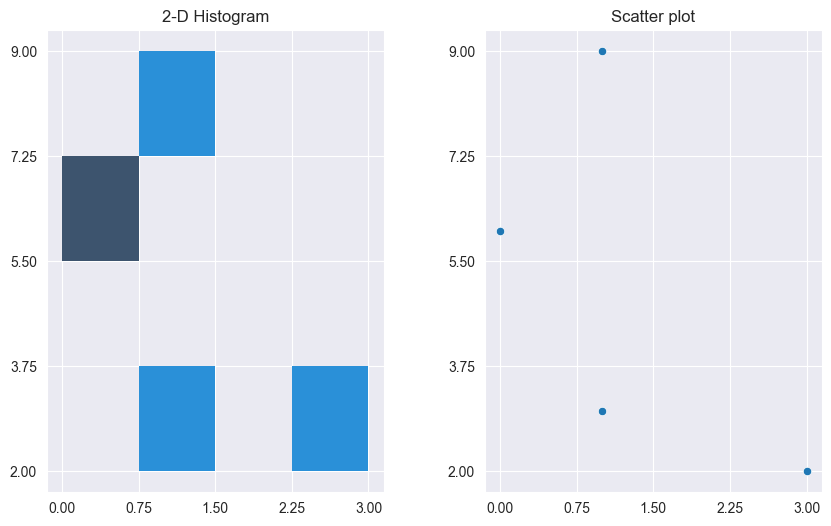

In [28]:
histo2d_w_graph(A[0], A[1], bs=4, sid=True)

 B: | shape: (2, 15) | ndim: 2 | size: 30 | dtype: int64 


array([[48, 29, 42, 41, 45, 24, 48, 40, 44, 37, 40, 44, 30, 26, 37],
       [40, 40, 43, 39, 27, 49, 38, 41, 40, 45, 41, 31, 49, 24, 28]],
      dtype=int64)

NumPy Density Array:
[[1. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 3. 0.]
 [1. 1. 0. 3. 0. 0.]]
X Edges:
 [24. 28. 32. 36. 40. 44. 48.]
Y Edges:
 [24.         28.16666667 32.33333333 36.5        40.66666667 44.83333333
 49.        ]

Density Array with relocated values:
[[1. 1. 0. 1. 0. 0.]
 [0. 0. 0. 0. 3. 0.]
 [0. 1. 0. 0. 1. 3.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 1. 0. 1.]]


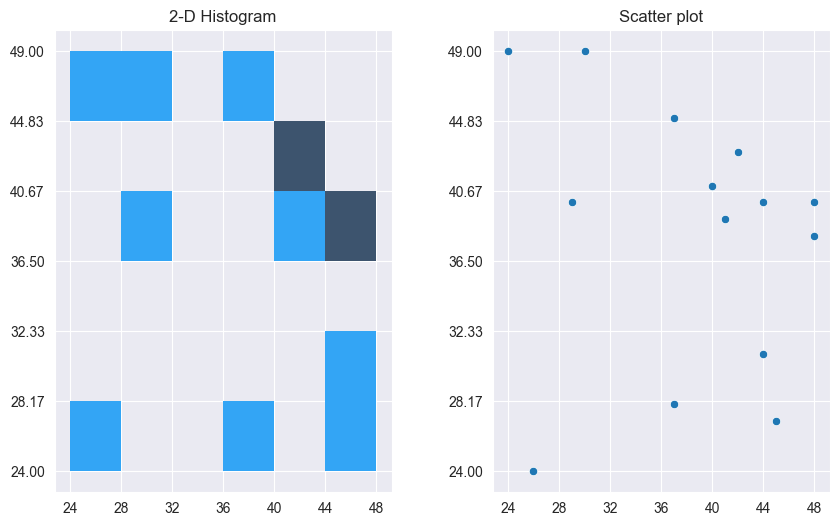

In [29]:
# Other example with more values, las B matrix randomized created
print(show_attr('B'))
display(B)

histo2d_w_graph(B[0], B[1], 6)

NumPy Density Array:
[[3. 5. 1. 3. 1.]
 [1. 5. 4. 2. 3.]
 [2. 2. 1. 0. 2.]
 [3. 2. 3. 3. 1.]
 [3. 1. 3. 1. 2.]]
X Edges:
 [ 1.53  11.322 21.114 30.906 40.698 50.49 ]
Y Edges:
 [ 0.51  10.608 20.706 30.804 40.902 51.   ]

Density Array with relocated values:
[[1. 3. 2. 1. 2.]
 [3. 2. 0. 3. 1.]
 [1. 4. 1. 3. 3.]
 [5. 5. 2. 2. 1.]
 [3. 1. 2. 3. 3.]]


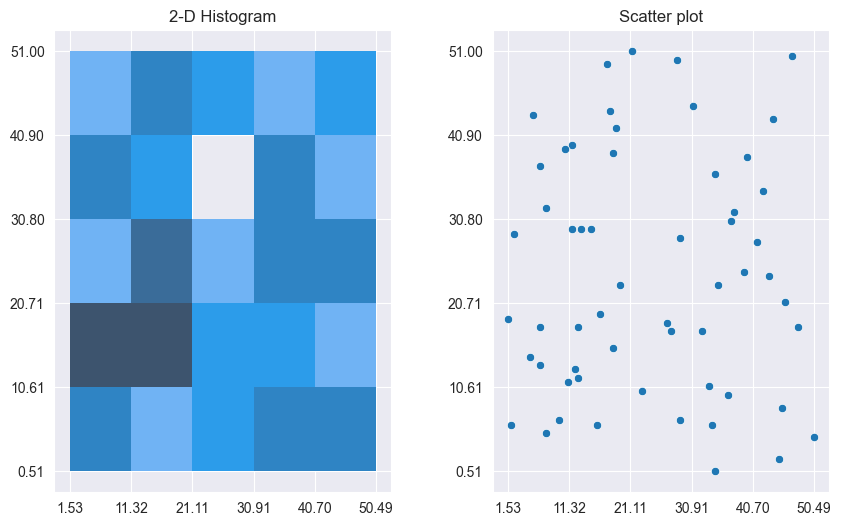

In [30]:
# Another example with decimal values

C = array_RG.random(size=(2,57))
C = np.round(C, 2) * 51
#display(C, show_attr('C'))

histo2d_w_graph(C[0], C[1], 5)